## Exploratory Data Analysis

### Imports and definitions

In [66]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import sklearn
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import albumentations
import tqdm

#### Random seeds for reproducibility

In [10]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

#### Constants

In [18]:
IMAGE_SIZE = (224, 224)

#### Download the dataset

To run this, it's needed to have kaggle.json from a kaggle key in ~/.kaggle folder

Alternatively, skip this part and manually download the dataset https://www.kaggle.com/datasets/volodymyrpivoshenko/brain-mri-scan-images-tumor-detection in ./data folder

In [69]:
import kaggle

os.makedirs("data", exist_ok=True)

kaggle.api.authenticate()

kaggle.api.dataset_download_files(
    "volodymyrpivoshenko/brain-mri-scan-images-tumor-detection", path="data", unzip=True
)

Dataset URL: https://www.kaggle.com/datasets/volodymyrpivoshenko/brain-mri-scan-images-tumor-detection


### Loading images

In [72]:
def load_imgs(data_root_folder="data"):
    images = []
    labels = []

    data_folder = os.path.join(data_root_folder, "brain_mri_scan_images")

    pos_folder = os.path.join(data_folder, "positive")
    neg_folder = os.path.join(data_folder, "negative")

    for img_name in os.listdir(pos_folder):
        img = cv2.imread(os.path.join(pos_folder, img_name))
        img = cv2.resize(img, IMAGE_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(1)

    for img_name in os.listdir(neg_folder):
        img = cv2.imread(os.path.join(neg_folder, img_name))
        img = cv2.resize(img, IMAGE_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(0)

    return np.array(images), np.array(labels)

In [73]:
images, labels = load_imgs()

#### Visualizing images of each class

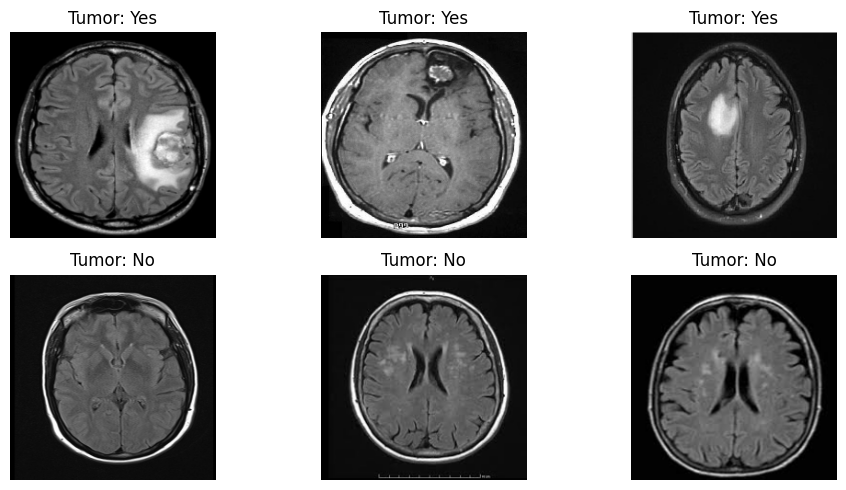

In [74]:
plt.figure(figsize=(10, 5))

for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[labels == 1][i + 10])
    plt.title("Tumor: Yes")
    plt.axis("off")

for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.imshow(images[labels == 0][i + 10])
    plt.title("Tumor: No")
    plt.axis("off")

plt.tight_layout()
plt.show()

#### Visualizing class distribution

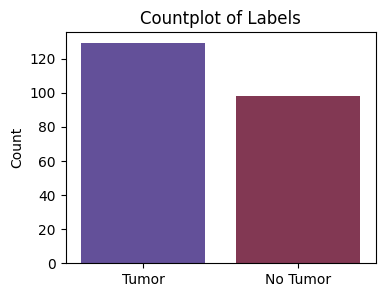

In [75]:
labels_nominal = np.where(labels == 0, "No Tumor", "Tumor")
plt.figure(figsize=(4, 3))
sns.countplot(x=labels_nominal, hue=labels_nominal, palette="twilight")
plt.title("Countplot of Labels")
plt.ylabel("Count")
plt.show()

### Data preprocessing